In [19]:
#Downloading the dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!kaggle datasets download -d tharakan684/urecamain

urecamain.zip: Skipping, found more recently modified local copy (use --force to force download)


In [20]:
#Unzipping the file
import zipfile
zip_ref = zipfile.ZipFile('/content/urecamain.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [41]:
#Importing Libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GaussianNoise, GlobalMaxPooling2D
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [22]:
#Loading the images
x_train= keras.utils.image_dataset_from_directory(
    directory = '/content/Train',
    labels='inferred',
    label_mode = 'int',
    batch_size=100,
    image_size=(256,256)
)

x_test= keras.utils.image_dataset_from_directory(
    directory = '/content/Test',
    labels='inferred',
    label_mode = 'int',
    batch_size=100,
    image_size=(256,256)
)

Found 8003 files belonging to 3 classes.
Found 2000 files belonging to 2 classes.


In [6]:
class_names = x_train.class_names
class_names

['Fire', 'Non-Fire']

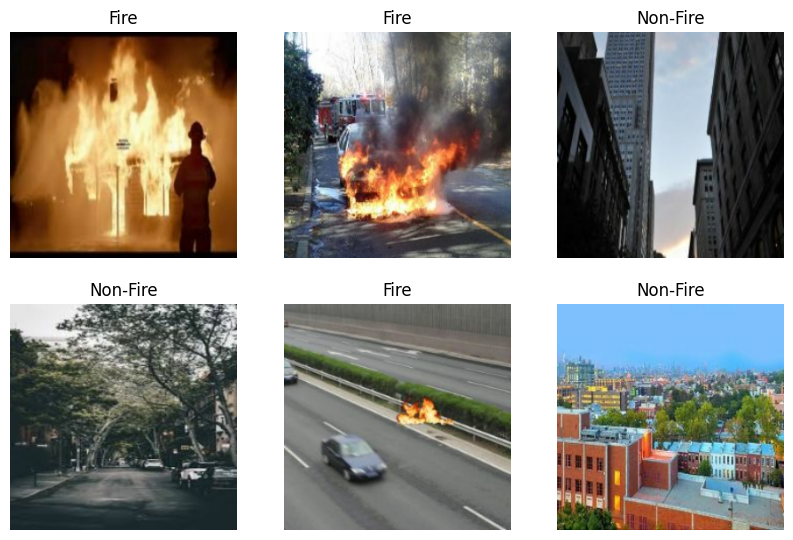

In [24]:
# Display a few sample images
plt.figure(figsize=(10, 10))
for images, labels in x_train.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [9]:
# Normalizing
def process(image,label):
    image = tf.cast(image/256. ,tf.float32)
    return image,label

x_train = x_train.map(process)
x_test = x_test.map(process)

In [10]:
input_shape = (256, 256, 3)

In [15]:
#Model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(GaussianNoise(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 256, 256, 32)     128       
 hNormalization)                                                 
                                                                 
 gaussian_noise_2 (GaussianN  (None, 256, 256, 32)     0         
 oise)                                                           
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 128, 128, 32)      0         
                                                      

In [18]:
history = model.fit(x_train,epochs=5, batch_size=200, validation_data=x_test)

Epoch 1/5
20/20 [==============================] - 589s 30s/step - loss: 1.2786 - accuracy: 0.6735 - val_loss: 0.6720 - val_accuracy: 0.6443
Epoch 2/5
20/20 [==============================] - 580s 30s/step - loss: 0.3386 - accuracy: 0.8655 - val_loss: 0.6731 - val_accuracy: 0.7538
Epoch 3/5
20/20 [==============================] - 577s 29s/step - loss: 0.2592 - accuracy: 0.9035 - val_loss: 0.6738 - val_accuracy: 0.7456
Epoch 4/5
20/20 [==============================] - 579s 30s/step - loss: 0.2108 - accuracy: 0.9200 - val_loss: 0.6709 - val_accuracy: 0.7243
Epoch 5/5
20/20 [==============================] - 521s 27s/step - loss: 0.1887 - accuracy: 0.9290 - val_loss: 0.6717 - val_accuracy: 0.7126


In [55]:
model.evaluate(x_test)

20/20 [==============================] - 80s 4s/step - loss: 2.8571 - accuracy: 0.7610


[2.8571362495422363, 0.7609999775886536]

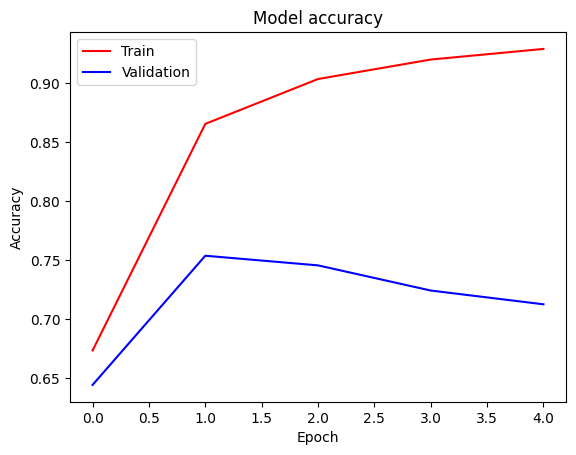

In [53]:
#Plotting  Graphs - Accuracy
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

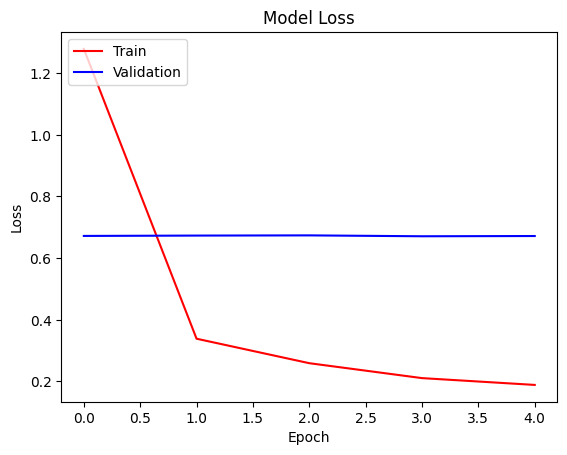

In [54]:
#Loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

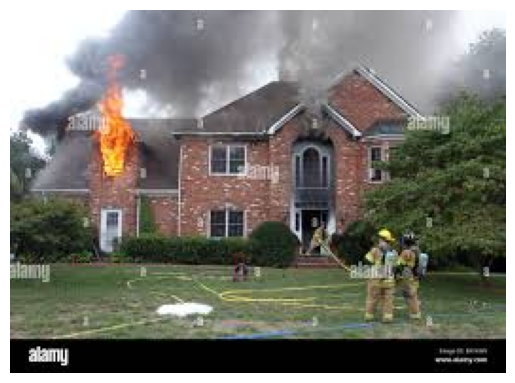

In [51]:
# Loading and displaying an image
image_path = "/content/Fire Image.jpg"
image = mpimg.imread(image_path)
resized_image = cv2.resize(image, (256, 256))
normalized_image = resized_image / 256.0
input_image = np.expand_dims(normalized_image, axis=0)


plt.imshow(image)
plt.axis('off')
plt.show()

In [52]:
#Making prediction
prediction = model.predict(input_image)
Fire = prediction >= 0.5
if Fire:
    print("Fire")
else:
    print("No Fire")

1/1 [==============================] - 0s 44ms/step
Fire
